In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from sklearn.metrics import r2_score
init_notebook_mode(connected=True)
%matplotlib inline
seed = 222
np.random.seed(seed)
sns.set_theme() # specify a theme
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [139]:
def model_fit(m, X, y, plot = False):

    y_hat = m.predict(X)
    rmse = mean_squared_error(y, y_hat, squared=False)
    r2 = r2_score(y, y_hat)
    res = pd.DataFrame(
            data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    if plot:
            plt.figure(figsize=(15, 5))
            plt.subplot(121)
            sns.lineplot(x='y', y='y_hat', color="grey", 
            data = pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
            sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
            plt.subplot(122)
            sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
            plt.suptitle("Model rmse = " + str(round(rmse, 4)), fontsize=16)
            plt.savefig('plots/trans.pdf')
            plt.show()
    return(r2, rmse)

In [3]:
def get_coef_df(df):

    my_df = pd.concat([df.pvalues.to_frame(name = "pvalues"), 
    df.params.to_frame(name = "params")], axis=1).sort_values(by=['params'], key=abs, ascending=False)
    return(my_df)

In [127]:
def get_ols(X_train, X_test, y_train, y_test, plot=False):

    m = sm.OLS(y_train, X_train).fit()
    r2_train, rmse_train = model_fit(m, X_train, y_train, plot=False)
    r2_test, rmse_test = model_fit(m, X_test, y_test, plot=plot)
    # most_imp = np.array(get_coef_df(est).head().index)
    return r2_train, rmse_train, r2_test , rmse_test # , most_imp

In [6]:
states = ['AL','AK',None,'AZ','AR','CA',None, 'CO','CT','DE',None,'FL','GA',None, None,'ID',None, 'IN','IA','KS',
            'KY','LA','ME','MD','MA',None, 'MI', 'MS', 'MO', None, None,'NV','NH','NJ','NM','NY',
            'NC', 'ND', 'OH','OK','OR','PA', None, 'RI','SC','SD','TN','TX','UT','VT', 'VA',None,'WA','WV','WI','WY']

In [7]:
df = pd.read_csv("communities/communities.csv",na_values=["?"], encoding='ISO-8859-1')

In [8]:
# remove whitespace
stripped_cols = [a.strip() for a in list(df.columns)]

df.columns = stripped_cols

# make sure we do not have any missing community names
sum(df['communityname'].isna())

0

In [9]:
pd.set_option('display.max_rows', 40)

In [10]:
def ff(n):
    return states[n - 1]

lst_states = np.array(list(df['state']))
lst_states_new = list(map(ff, lst_states))

df.insert(1, 'state_name', lst_states_new)

In [11]:
df

,Unnamed: 0,state_name,state,county,community,communityname,fold,population,householdsize,racepctblack,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,1,CO,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,2,WA,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,3,MD,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,4,NJ,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,5,PA,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,FL,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,1991,CA,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,1992,CT,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,1993,MA,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [12]:
# these are the columns that have many missing values
many_nans = [(col, df[col].isna().sum()) for col in df.columns if df[col].isna().sum()/df.shape[0] > 0.5]
many_nans

[('county', 1174),
 ('community', 1177),
 ('LemasSwornFT', 1675),
 ('LemasSwFTPerPop', 1675),
 ('LemasSwFTFieldOps', 1675),
 ('LemasSwFTFieldPerPop', 1675),
 ('LemasTotalReq', 1675),
 ('LemasTotReqPerPop', 1675),
 ('PolicReqPerOffic', 1675),
 ('PolicPerPop', 1675),
 ('RacialMatchCommPol', 1675),
 ('PctPolicWhite', 1675),
 ('PctPolicBlack', 1675),
 ('PctPolicHisp', 1675),
 ('PctPolicAsian', 1675),
 ('PctPolicMinor', 1675),
 ('OfficAssgnDrugUnits', 1675),
 ('NumKindsDrugsSeiz', 1675),
 ('PolicAveOTWorked', 1675),
 ('PolicCars', 1675),
 ('PolicOperBudg', 1675),
 ('LemasPctPolicOnPatr', 1675),
 ('LemasGangUnitDeploy', 1675),
 ('PolicBudgPerPop', 1675)]

## Check Patterns for NaN

In [14]:
df_small = df[~ df['PctPolicAsian'].isnull()]

In [15]:
df_small_clean = df_small.dropna(axis=1, thresh=30)
df_small_clean.drop(['county', 'community', 'Unnamed: 0'], axis=1, inplace=True)
df_small_clean

,state_name,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,CO,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
16,NY,36,Albanycity,1,0.15,0.31,0.40,0.63,0.14,0.06,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,CA,6,Modestocity,1,0.25,0.54,0.05,0.71,0.48,0.30,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,FL,12,Jacksonvillecity,1,1.00,0.42,0.47,0.59,0.12,0.05,...,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
23,IA,19,SiouxCitycity,1,0.11,0.43,0.04,0.89,0.09,0.06,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,CA,6,SanFranciscocity,10,1.00,0.29,0.21,0.29,1.00,0.26,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
1981,CT,9,Hamdentown,10,0.07,0.38,0.17,0.84,0.11,0.04,...,0.09,0.13,0.17,0.02,0.01,0.72,0.0,0.62,0.15,0.07
1991,CT,9,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,MA,25,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


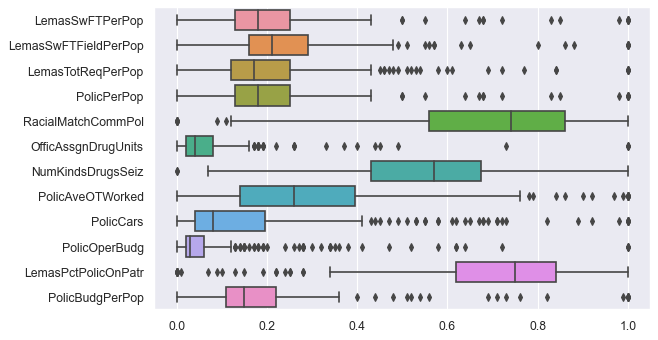

In [16]:
sns.boxplot(data=df_small_clean[['LemasSwFTPerPop', 'LemasSwFTFieldPerPop', 'LemasTotReqPerPop',
            'PolicPerPop', 'RacialMatchCommPol', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 
            'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'PolicBudgPerPop' ]], orient='h')
plt.show()

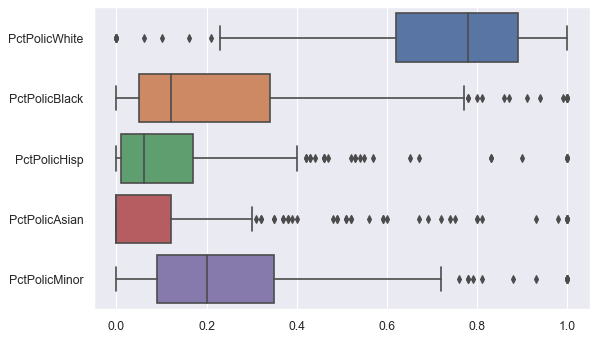

In [17]:
sns.boxplot(data=df_small_clean[['PctPolicWhite','PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor' ]], orient='h')
plt.show()

In [24]:
# drop all of the columns that have more than 50% missing values
df_clean = df.dropna(axis=1, thresh=1000)
#left with 105 columns

In [25]:
# check that we have no missing responses
sum(df_clean['ViolentCrimesPerPop'].isna())

0

In [26]:
# these are the columns that have many missing values
many_nans = [(col, df_clean[col].isna().sum()) for col in df_clean.columns if df_clean[col].isna().sum()/df_clean.shape[0] > 0]
many_nans

[('state_name', 1), ('OtherPerCap', 1)]

In [27]:
df_clean[df_clean.isnull().any(axis=1)]

,Unnamed: 0,state_name,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
130,131,MS,28,Natchezcity,1,0.02,0.38,0.98,0.22,0.01,...,0.01,0.84,0.70,0.83,0.77,0.04,0.12,0.05,0.00,0.23
1044,1045,None,11,Washingtoncity,6,0.96,0.32,1.00,0.00,0.11,...,0.29,0.36,0.57,0.61,0.33,0.18,0.83,1.00,0.45,1.00


In [28]:
# drop the above two observations
df_clean_filled = df_clean.dropna(axis=0)
df_clean_filled

,Unnamed: 0,state_name,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1,CO,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,2,WA,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,3,MD,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,4,NJ,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,5,PA,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,FL,12,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,1991,CA,6,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,1992,CT,9,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,1993,MA,25,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


## This is just to create a cloropleth map

In [32]:
# https://www.kaggle.com/code/kkanda/analyzing-uci-crime-and-communities-dataset/notebook 
#group Violent crime and nonViolent crime by state
crimedata_state = df_clean_filled.groupby('state_name').agg({'ViolentCrimesPerPop':'mean'})[['ViolentCrimesPerPop']].reset_index()

##Aggregate view of Violent Crimes by State
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "Earth",
        locations = crimedata_state['state_name'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype('float')
        # colorbar = {'title':'Violent Crimes(Per-100K-Pop)'}
        )
layout2 = dict(
        # title = 'Average Violent Crimes Per 100K Population across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )
    
fig2 = go.Figure(data = data2,layout = layout2)
fig2.data[0].colorbar.x= -0.000001
iplot(fig2,validate=False)

In [166]:
#group Violent crime and nonViolent crime by state
crimedata_state = df_clean_filled.groupby('state_name').agg({'racepctblack':'mean'})[['racepctblack']].reset_index()

##Aggregate view of Violent Crimes by State
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "brwnyl",
        locations = crimedata_state['state_name'],
        locationmode = 'USA-states',
        z = crimedata_state['racepctblack'].astype('float')
        # colorbar = {'title':'Violent Crimes(Per-100K-Pop)'}
        )
layout2 = dict(
        # title = 'Black Per cap across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )
    
fig2 = go.Figure(data = data2,layout = layout2)
fig2.data[0].colorbar.x=-0.00001
iplot(fig2,validate=False)


In [34]:
#group Violent crime and nonViolent crime by state
crimedata_state = df_clean_filled.groupby('state_name').agg({'medIncome':'mean'})[['medIncome']].reset_index()

##Aggregate view of Violent Crimes by State
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "blues",
        locations = crimedata_state['state_name'],
        locationmode = 'USA-states',
        z = crimedata_state['medIncome'].astype('float')
        # colorbar = {'title':'Violent Crimes(Per-100K-Pop)'}
        )
layout2 = dict(
        # title = 'Med Income across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )
    
fig2 = go.Figure(data = data2,layout = layout2)
fig2.data[0].colorbar.x=-0.00001
iplot(fig2,validate=False)

In [35]:
#group Violent crime and nonViolent crime by state
crimedata_state = df_clean_filled.groupby('state_name').agg({'PctIlleg':'mean'})[['PctIlleg']].reset_index()

##Aggregate view of Violent Crimes by State
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "oranges",
        locations = crimedata_state['state_name'],
        locationmode = 'USA-states',
        z = crimedata_state['PctIlleg'].astype('float')
        # colorbar = {'title':'Violent Crimes(Per-100K-Pop)'}
        )
layout2 = dict(
        # title = 'Illegal imigrants across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )
    
fig2 = go.Figure(data = data2,layout = layout2)
fig2.data[0].colorbar.x=-0.001
iplot(fig2,validate=False)

In [167]:
#group Violent crime and nonViolent crime by state
crimedata_state = df_clean_filled.groupby('state_name').agg({'NumImmig':'mean'})[['NumImmig']].reset_index()

##Aggregate view of Violent Crimes by State
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "oranges",
        locations = crimedata_state['state_name'],
        locationmode = 'USA-states',
        z = crimedata_state['NumImmig'].astype('float')
        # colorbar = {'title':'Violent Crimes(Per-100K-Pop)'}
        )
layout2 = dict(
        # title = 'Illegal imigrants across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )
    
fig2 = go.Figure(data = data2,layout = layout2)
fig2.data[0].colorbar.x=-0.001
iplot(fig2,validate=False)

## Make regression only for race

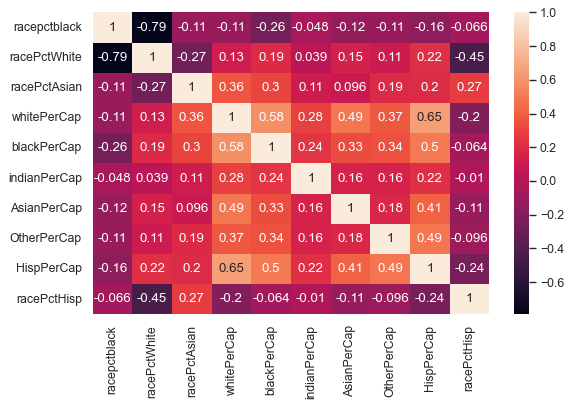

In [36]:
cols_race = [ 'racepctblack','racePctWhite','racePctAsian', 'whitePerCap', 'blackPerCap',
                'indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','racePctHisp']
X_race = df_clean_filled[cols_race]
y = df_clean_filled['ViolentCrimesPerPop']
sns.heatmap(X_race.corr(),annot=True)
plt.show()

In [37]:
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X_race),np.log(y,  where=(y!=0)),random_state=0)

/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [38]:
est = sm.OLS(y_train, X_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.472
Model:                             OLS   Adj. R-squared:                  0.469
Method:                  Least Squares   F-statistic:                     132.6
Date:                 Fri, 22 Apr 2022   Prob (F-statistic):          1.14e-197
Time:                         15:32:08   Log-Likelihood:                -1757.7
No. Observations:                 1494   AIC:                             3537.
Df Residuals:                     1483   BIC:                             3596.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.7057      0.338     -5.045      0.000      -2.369      -1.043
racepctblack     1.9817      0.286      6.928      0.000       1.421       2.543
racePctWhite    -0.2986      0.338     -0.883      0.377      -0.962       0.365
racePctAsian     0.5240      0.158      3.312      0.001       0.214       0.834
whitePerCap     -0.6391      0.176     -3.627      0.000      -0.985      -0.293
blackPerCap     -0.5607      0.159     -3.527      0.000      -0.873      -0.249
indianPerCap    -0.1473      0.131     -1.125      0.261      -0.404       0.110
AsianPerCap     -0.1900      0.123     -1.543      0.123      -0.432       0.052
OtherPerCap      0.0574      0.126      0.455      0.649      -0.190       0.305
HispPerCap      -0.3242      0.169     -1.917      0.055      -0.656       0.007
racePctHisp      1.1999      0.172      6.985      0.000       0.863       1.537
==============================================================================
Omnibus:                       23.712   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.540
Skew:                          -0.070   Prob(JB):                     9.54e-10
Kurtosis:                       3.805   Cond. No.                         43.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
get_coef_df(est)

,pvalues,params
racepctblack,6.343292e-12,1.981704
const,5.094747e-07,-1.705743
racePctHisp,4.272308e-12,1.199866
whitePerCap,2.961441e-04,-0.639095
blackPerCap,4.331745e-04,-0.560735
racePctAsian,9.472160e-04,0.524010
HispPerCap,5.539570e-02,-0.324170
racePctWhite,3.772660e-01,-0.298636
AsianPerCap,1.230679e-01,-0.190034
indianPerCap,2.608223e-01,-0.147288


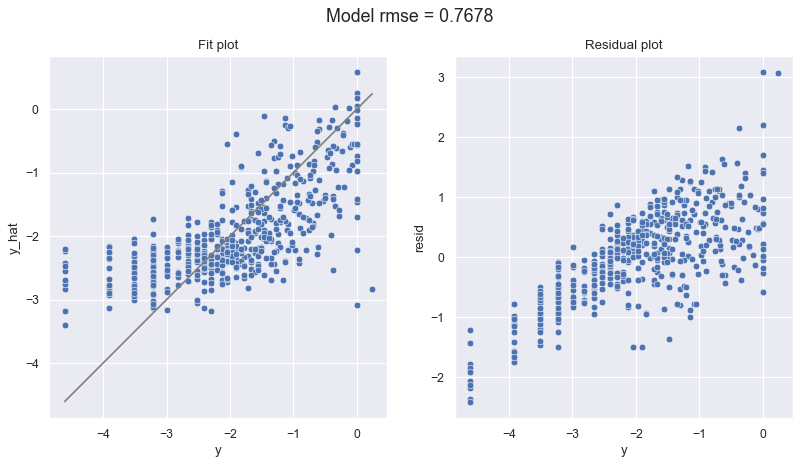

(0.4798359487290951, 0.7678381971228194)

In [40]:
model_fit(est, X_test, y_test, plot=True)

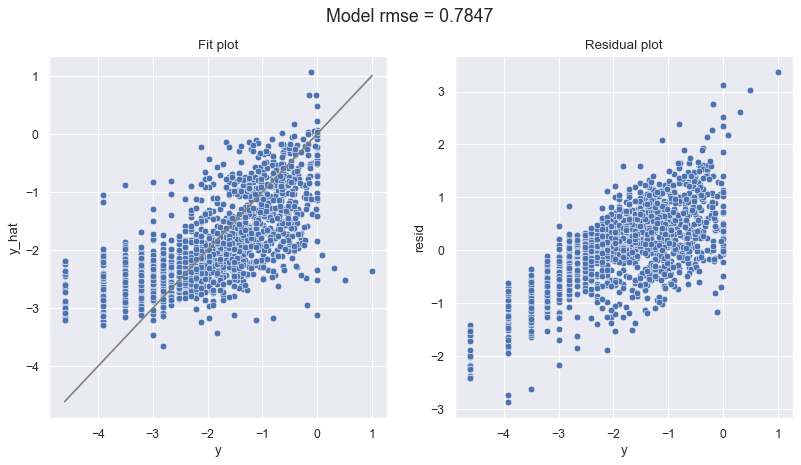

(0.47213427470587976, 0.784707442352632)

In [41]:
model_fit(est, X_train, y_train, plot=True)

In [138]:
all_r2_train = [] ; all_rmse_train = [] ; all_r2_test = [] ; all_rmse_test = []
X_fitted = sm.add_constant(X_race)
y_log = np.log(y,  where=(y!=0))
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_fitted,y_log)
    r2_train, rmse_train, r2_test , rmse_test = get_ols(X_train, X_test, y_train, y_test, plot=False)
    all_r2_train.append(r2_train)
    all_rmse_train.append(rmse_train)
    all_r2_test.append(r2_test)
    all_rmse_test.append(rmse_test)
av1 = np.average(np.array(all_r2_train))
av2 = np.average(np.array(all_rmse_train))
av3 = np.average(np.array(all_r2_test))
av4 = np.average(np.array(all_rmse_test))
print(av1, av2, av3, av4)

/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



0.48105089549992314 0.7734192760482016 0.4691905922175873 0.7797279793172072


## Here we drop very correlated columns between them

In [42]:
# https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on 
# Create correlation matrix
corr_matrix = df_clean_filled.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
# drop the columns that are very correlated between them
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['fold',
 'numbUrban',
 'medFamInc',
 'whitePerCap',
 'PctOccupMgmtProf',
 'TotalPctDiv',
 'PctKids2Par',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctLargHouseOccup',
 'PctHousOwnOcc',
 'OwnOccMedVal',
 'OwnOccHiQuart',
 'RentMedian',
 'RentHighQ',
 'MedRent',
 'PctForeignBorn']

In [43]:
# Drop features 
df_clean_filled.drop(to_drop, axis=1, inplace=True)
len(df_clean_filled.columns)

/Users/lysi2/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



88

In [44]:
# check that there are no dublicates
sum(df_clean_filled.duplicated())

0

<AxesSubplot:xlabel='ViolentCrimesPerPop', ylabel='Density'>

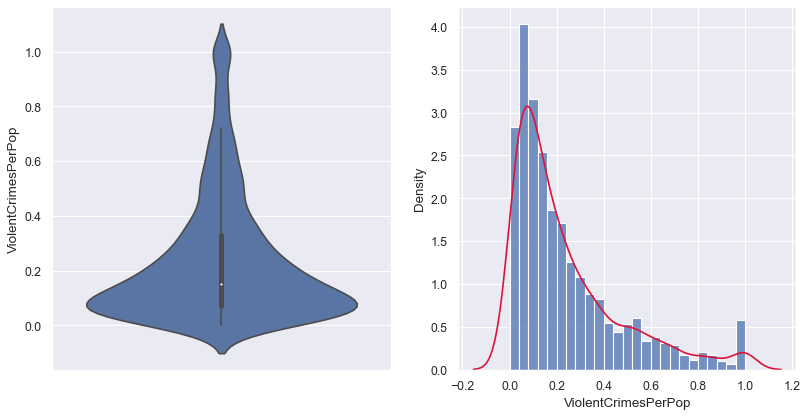

In [52]:
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(121)
sns.violinplot(y = 'ViolentCrimesPerPop', data= df_clean_filled)
fig.add_subplot(122)
sns.histplot(x = 'ViolentCrimesPerPop', data=df_clean_filled, stat='density')
sns.kdeplot(x = 'ViolentCrimesPerPop', data=df_clean_filled, color='crimson')

In [54]:
df_clean_filled['many_divorsed'] = np.where(df_clean_filled['MalePctDivorce'] >= df_clean_filled['MalePctDivorce'].mean(), True, False)

/Users/lysi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
def create_categorical(df, col):
    return pd.cut(df[col], [0, df[col].quantile(0.25), df[col].quantile(0.75),1], labels=['low', 'medium', 'high'])

In [57]:
df_clean_filled['raceblack_categorical'] = create_categorical(df_clean_filled, 'racepctblack')
df_clean_filled['many_ages'] = create_categorical(df_clean_filled, 'agePct16t24')

/Users/lysi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/lysi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



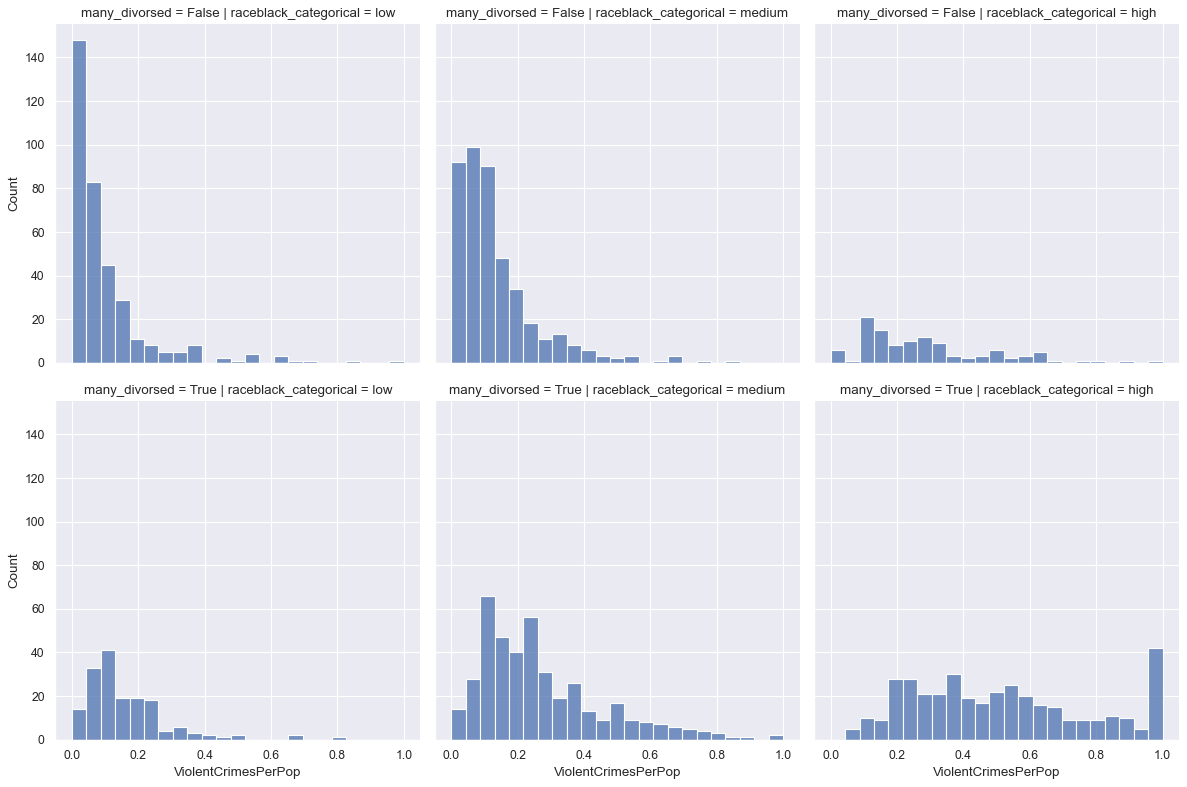

In [58]:
g = sns.displot(data = df_clean_filled, row="many_divorsed", col="raceblack_categorical", x = df_clean_filled["ViolentCrimesPerPop"])

<function matplotlib.pyplot.show(close=None, block=None)>

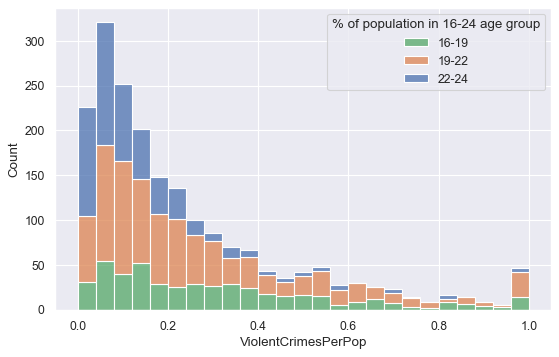

In [60]:
# sns.displot(x='ViolentCrimesPerPop', hue='agePct12t21', color='red', label='Age%12-21', data=df_clean_filled)
sns.histplot(x=df_clean_filled['ViolentCrimesPerPop'], hue='many_ages', color='red',
     data=df_clean_filled, multiple='stack')
plt.legend(title= '% of population in 16-24 age group', labels = ['16-19', '19-22', '22-24'])
plt.savefig('plots/age_violent.pdf')
plt.show


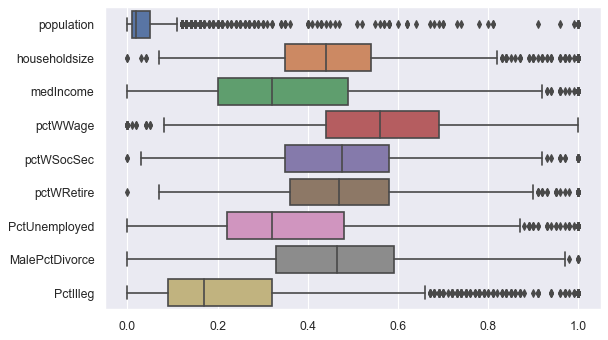

In [61]:
sns.boxplot(data=df_clean_filled[[ 'population', 'householdsize', 'medIncome', 'pctWWage',
 'pctWSocSec', 'pctWRetire', 'PctUnemployed', 'MalePctDivorce', 'PctIlleg' ]], orient='h')
plt.savefig('plots/box_plot_socio.pdf')
plt.show()

In [64]:
df_clean_filled = df_clean_filled.drop('Unnamed: 0', axis=1)
df_clean_filled

,state_name,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,many_divorsed,raceblack_categorical,many_ages,kids_never_mar_categorical
0,CO,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.64,0.12,0.26,0.20,0.32,0.20,True,low,medium,medium
1,WA,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.52,0.02,0.12,0.45,0.00,0.67,True,medium,medium,medium
2,MD,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.56,0.01,0.21,0.02,0.00,0.43,True,high,medium,high
3,NJ,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.65,0.02,0.39,0.28,0.00,0.12,False,high,medium,high
4,PA,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.53,0.04,0.09,0.02,0.00,0.03,False,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,FL,12,TempleTerracecity,0.01,0.40,0.10,0.87,0.12,0.16,0.43,...,0.39,0.01,0.28,0.05,0.00,0.09,False,medium,medium,medium
1990,CA,6,Seasidecity,0.05,0.96,0.46,0.28,0.83,0.32,0.69,...,0.00,0.02,0.37,0.20,0.00,0.45,False,high,high,high
1991,CT,9,Waterburytown,0.16,0.37,0.25,0.69,0.04,0.25,0.35,...,0.76,0.08,0.32,0.18,0.91,0.23,True,high,medium,high
1992,MA,25,Walthamcity,0.08,0.51,0.06,0.87,0.22,0.10,0.58,...,0.52,0.03,0.38,0.33,0.22,0.19,False,medium,high,medium


In [65]:
# find the places where the correlation with the response is very small
# added 2 because the corrwith function skips the categorical ones (state_name and communityname)
not_very_correlated_indeces = np.where(np.abs(df_clean_filled.corrwith(df_clean_filled['ViolentCrimesPerPop'])) <= 0.2)[0] + 2
df_clean_filled.columns[not_very_correlated_indeces]

Index(['householdsize', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'pctUrban', 'pctWFarmSelf', 'pctWSocSec',
       'pctWRetire', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'PctEmplManu', 'PctEmplProfServ', 'PersPerFam', 'PctWorkMomYoungKids',
       'PctWorkMom', 'PctImmigRecent', 'PersPerOccupHous', 'PersPerOwnOccHous',
       'PctVacMore6Mos', 'MedYrHousBuilt', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'PctBornSameState', 'PctSameHouse85',
       'PctSameCity85', 'PctSameState85', 'LandArea', 'PctUsePubTrans'],
      dtype='object')

In [66]:
df_crime = df_clean_filled.drop(df_clean_filled.columns[[not_very_correlated_indeces]], axis=1)
df_crime

/Users/lysi2/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:4616: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



,state_name,state,communityname,population,racepctblack,racePctWhite,racePctHisp,medIncome,pctWWage,pctWInvInc,...,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop,many_divorsed,raceblack_categorical,many_ages,kids_never_mar_categorical
0,CO,8,Lakewoodcity,0.19,0.02,0.90,0.17,0.37,0.72,0.60,...,0.38,0.04,0.00,0.26,0.32,0.20,True,low,medium,medium
1,WA,53,Tukwilacity,0.00,0.12,0.74,0.07,0.31,0.72,0.45,...,0.29,0.00,0.00,0.12,0.00,0.67,True,medium,medium,medium
2,MD,24,Aberdeentown,0.00,0.49,0.56,0.04,0.30,0.58,0.39,...,0.48,0.00,0.00,0.21,0.00,0.43,True,high,medium,high
3,NJ,34,Willingborotownship,0.04,1.00,0.08,0.10,0.58,0.89,0.43,...,0.63,0.00,0.00,0.39,0.00,0.12,False,high,medium,high
4,PA,42,Bethlehemtownship,0.01,0.02,0.95,0.05,0.50,0.72,0.68,...,0.22,0.00,0.00,0.09,0.00,0.03,False,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,FL,12,TempleTerracecity,0.01,0.10,0.87,0.16,0.42,0.74,0.64,...,0.50,0.00,0.00,0.28,0.00,0.09,False,medium,medium,medium
1990,CA,6,Seasidecity,0.05,0.46,0.28,0.32,0.28,0.76,0.30,...,0.69,0.01,0.00,0.37,0.00,0.45,False,high,high,high
1991,CT,9,Waterburytown,0.16,0.25,0.69,0.25,0.31,0.47,0.45,...,0.52,0.06,0.02,0.32,0.91,0.23,True,high,medium,high
1992,MA,25,Walthamcity,0.08,0.06,0.87,0.10,0.44,0.64,0.55,...,0.43,0.04,0.01,0.38,0.22,0.19,False,medium,high,medium


<AxesSubplot:>

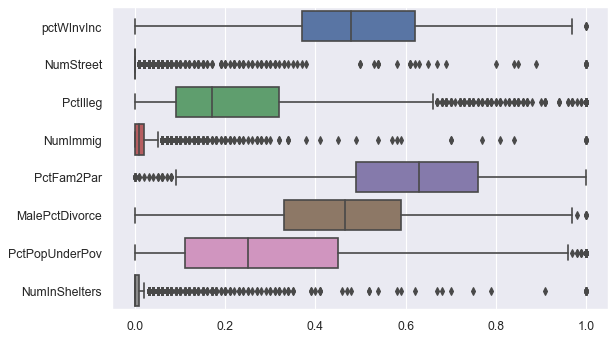

In [121]:
sns.boxplot(data=df_crime[['pctWInvInc', 'NumStreet', 'PctIlleg', 'NumImmig', 'PctFam2Par'
    ,'MalePctDivorce', 'PctPopUnderPov', 'NumInShelters' ]], orient='h')

In [67]:
X = df_crime.drop(['state_name', 'communityname', 'ViolentCrimesPerPop', 'many_divorsed', 'raceblack_categorical', 'many_ages'], axis=1)
y = df_crime['ViolentCrimesPerPop']

In [68]:
# this is basically done above but I wanted to remove even more very correlated columns:

corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
# drop the columns that are very correlated between them
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop

['perCapInc',
 'NumUnderPov',
 'PctNotHSGrad',
 'PctEmploy',
 'FemalePctDiv',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'NumIlleg',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctSpeakEnglOnly',
 'PctNotSpeakEnglWell',
 'PctPersDenseHous',
 'HousVacant',
 'RentLowQ']

In [69]:
X.drop(to_drop, axis=1, inplace=True)

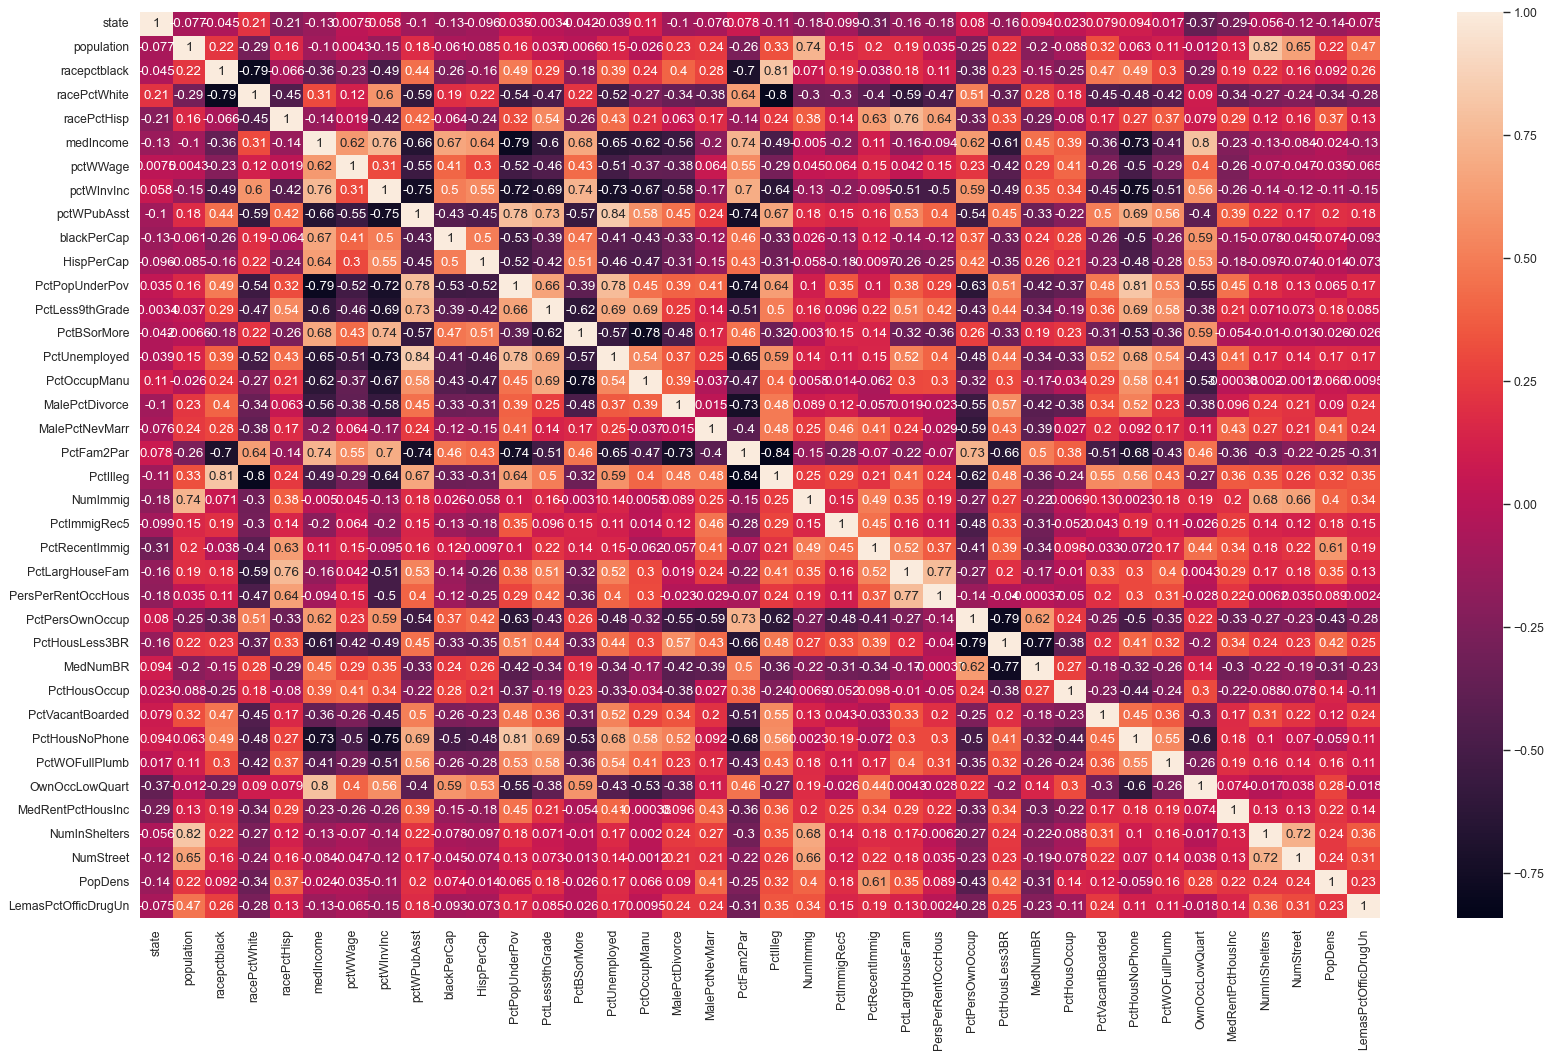

In [70]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(X.corr(), annot=True, ax=ax)
plt.show()

In [128]:
X.describe()

,state,population,racepctblack,racePctWhite,racePctHisp,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,...,PctHousOccup,PctVacantBoarded,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,...,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,28.692771,0.057159,0.178815,0.754362,0.144111,0.361280,0.558313,0.495843,0.317490,0.291155,...,0.719724,0.204076,0.264362,0.242791,0.264799,0.490095,0.028966,0.022651,0.232610,0.093921
std,16.400989,0.125345,0.252264,0.243282,0.232587,0.209377,0.182866,0.178089,0.221992,0.171649,...,0.194041,0.217136,0.242906,0.206221,0.224490,0.169563,0.100324,0.100257,0.202737,0.240307
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.010000,0.020000,0.630000,0.010000,0.200000,0.440000,0.370000,0.140000,0.177500,...,0.630000,0.060000,0.060000,0.100000,0.090000,0.370000,0.000000,0.000000,0.100000,0.000000
50%,34.000000,0.020000,0.060000,0.850000,0.040000,0.320000,0.560000,0.480000,0.260000,0.250000,...,0.770000,0.130000,0.180000,0.190000,0.180000,0.480000,0.000000,0.000000,0.170000,0.000000
75%,42.000000,0.050000,0.230000,0.940000,0.160000,0.490000,0.690000,0.620000,0.440000,0.380000,...,0.860000,0.270000,0.420000,0.330000,0.400000,0.590000,0.010000,0.000000,0.280000,0.000000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Baseline model

In [129]:
fitted_X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(fitted_X,y,random_state=0)

/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



### Note: there is no transformation here

In [130]:
base_model = sm.OLS(y_train, X_train).fit()
base_model.summary().tables[0]

Dep. Variable:,ViolentCrimesPerPop,R-squared:,0.668
Model:,OLS,Adj. R-squared:,0.659
Method:,Least Squares,F-statistic:,77.06
Date:,"Fri, 22 Apr 2022",Prob (F-statistic):,1.72e-316
Time:,17:28:42,Log-Likelihood:,898.09
No. Observations:,1494,AIC:,-1718.
Df Residuals:,1455,BIC:,-1511.
Df Model:,38,,
Covariance Type:,nonrobust,,


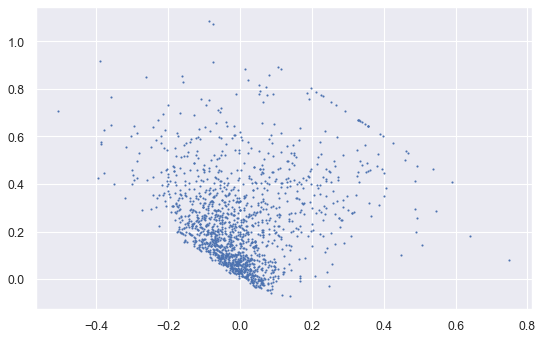

In [131]:
plt.scatter(base_model.resid, base_model.fittedvalues, s=0.8)

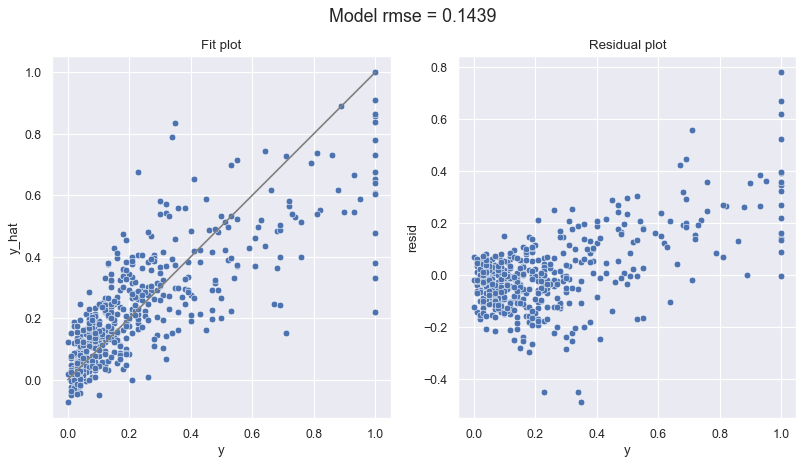

In [132]:
base_r2_train, base_rmse_train = model_fit(base_model, X_train, y_train, plot=False)
base_r2_test, base_rmse_test = model_fit(base_model, X_test, y_test, plot=True)

In [133]:
print(base_r2_train, base_rmse_train, base_r2_test, base_rmse_test)

0.6680558590651415 0.13264642764093787 0.6371185586338142 0.14387243481009576


In [134]:
# now try permuting
fitted_X = sm.add_constant(X)

all_r2_train = [] ; all_rmse_train = [] ; all_r2_test = [] ; all_rmse_test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(fitted_X,y)
    r2_train, rmse_train, r2_test , rmse_test = get_ols(X_train, X_test, y_train, y_test, plot=False)
    all_r2_train.append(r2_train)
    all_rmse_train.append(rmse_train)
    all_r2_test.append(r2_test)
    all_rmse_test.append(rmse_test)
av1 = np.average(np.array(all_r2_train))
av2 = np.average(np.array(all_rmse_train))
av3 = np.average(np.array(all_r2_test))
av4 = np.average(np.array(all_rmse_test))
print(av1, av2, av3, av4)


/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



0.6660664653351137 0.13451827092937177 0.6392859445838904 0.13832582819199846


In [78]:
# https://www.statology.org/white-test-in-python/ 
#perform White's test
white_test = het_white(base_model.resid,  base_model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 1005.3673808902072, 'Test Statistic p-value': 6.655217108255207e-08, 'F-Statistic': 1.8858323837786282, 'F-Test p-value': 6.4416230589905255e-18}


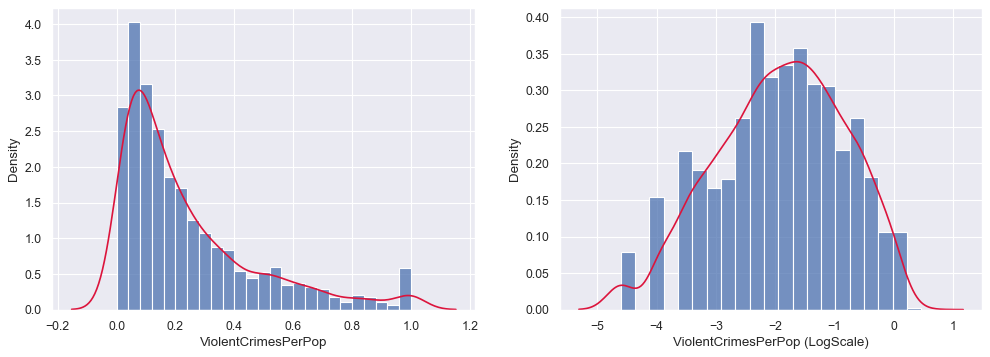

In [79]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(121)
sns.histplot(x = 'ViolentCrimesPerPop', data=df_clean_filled, stat='density')
sns.kdeplot(df_clean_filled['ViolentCrimesPerPop'], color='crimson')
fig.add_subplot(122)
transform_y = np.log(y, where=(y != 0))
sns.histplot(x = transform_y, stat='density')
sns.kdeplot(x =transform_y, color='crimson')
plt.xlabel('ViolentCrimesPerPop (LogScale)')
plt.savefig('plots/y_transformed.pdf')

plt.show()

In [80]:
get_coef_df(base_model)

,pvalues,params
const,1.005607e-04,0.485888
NumStreet,3.735300e-05,0.209554
PctIlleg,2.275024e-05,0.202496
pctWInvInc,5.106678e-03,-0.181337
NumImmig,3.666102e-02,-0.167510
PctFam2Par,2.790852e-02,-0.167313
racepctblack,4.622561e-03,0.141139
NumInShelters,6.670116e-02,0.125412
pctWWage,2.131267e-02,-0.110711
MalePctDivorce,4.605855e-02,0.090115


## Now try a model with transforming y 

In [141]:
X_fit = sm.add_constant(X)
y_logged = np.log(y, where=(y!=0))
X_train, X_test, y_train, y_test = train_test_split(X_fit,y_logged,random_state=0)

trans_model = sm.OLS(y_train,X_train).fit()

#perform White's test
white_test = het_white(trans_model.resid,  trans_model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



{'Test Statistic': 790.0057264483842, 'Test Statistic p-value': 0.3842277385672177, 'F-Statistic': 1.0285416124052003, 'F-Test p-value': 0.3509314237091136}


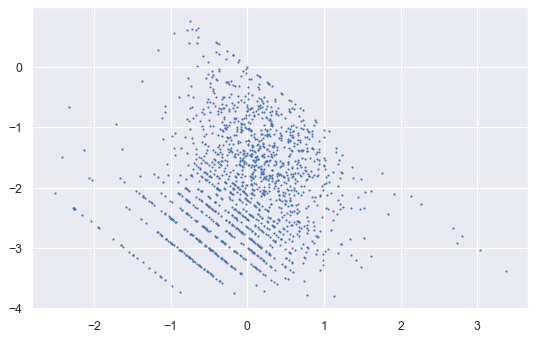

In [142]:
# this new plot shows us that we got rid of heterodicity by having a large 
# p-value (insufficient evidence) and the plot looks better
plt.scatter(trans_model.resid, trans_model.fittedvalues, s=0.8)

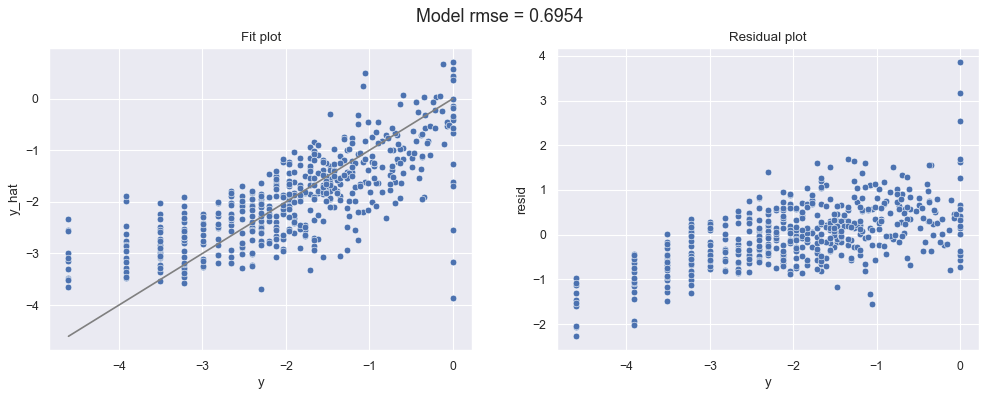

In [143]:
trans_r2_train, trans_rmse_train = model_fit(trans_model, X_train, y_train, plot=False)
trans_r2_test, trans_rmse_test = model_fit(trans_model, X_test, y_test, plot=True)

In [84]:
print(trans_r2_train, trans_rmse_train, trans_r2_test, trans_rmse_test)

0.6388676427846496 0.6486331603765207 0.5698999912224656 0.6983892449260345


In [85]:
trans_model.summary().tables[0]

Dep. Variable:,ViolentCrimesPerPop,R-squared:,0.639
Model:,OLS,Adj. R-squared:,0.629
Method:,Least Squares,F-statistic:,67.74
Date:,"Fri, 22 Apr 2022",Prob (F-statistic):,3.26e-290
Time:,15:32:40,Log-Likelihood:,-1473.2
No. Observations:,1494,AIC:,3024.
Df Residuals:,1455,BIC:,3231.
Df Model:,38,,
Covariance Type:,nonrobust,,


In [86]:
get_coef_df(trans_model)

,pvalues,params
pctWInvInc,3.685450e-10,-1.995244
pctWWage,2.608808e-06,-1.108194
MalePctDivorce,9.022334e-05,0.866612
racePctHisp,4.856458e-05,0.717406
racePctWhite,7.477391e-03,-0.662888
PctPopUnderPov,2.137988e-02,-0.643639
PersPerRentOccHous,3.730843e-03,0.635319
const,3.190869e-01,0.607191
PctFam2Par,1.382633e-01,-0.551351
PctOccupManu,3.904725e-03,-0.523445


In [135]:
fitted_X = sm.add_constant(X)
y_logged = np.log(y, where=(y!=0))

all_r2_train = [] ; all_rmse_train = [] ; all_r2_test = [] ; all_rmse_test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(fitted_X,y_logged)
    r2_train, rmse_train, r2_test , rmse_test = get_ols(X_train, X_test, y_train, y_test, plot=False)
    all_r2_train.append(r2_train)
    all_rmse_train.append(rmse_train)
    all_r2_test.append(r2_test)
    all_rmse_test.append(rmse_test)
av1 = np.average(np.array(all_r2_train))
av2 = np.average(np.array(all_rmse_train))
av3 = np.average(np.array(all_r2_test))
av4 = np.average(np.array(all_rmse_test))
print(av1, av2, av3, av4)

/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



0.6305751763043866 0.652884957300005 0.6074630663866044 0.6709488655239946


In [87]:
influence = trans_model.get_influence()

In [88]:
cooks_distances = influence.cooks_distance[0]
idx = (-cooks_distances).argsort()[:5]

In [89]:
# not large enough to be considered outliers
np.sort(cooks_distances)[-5:]

array([0.01164623, 0.01481855, 0.0233231 , 0.02910276, 0.04495128])

In [90]:
# these are supposed to be the most influencial points
X.iloc[idx]

,state,population,racepctblack,racePctWhite,racePctHisp,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,...,PctHousOccup,PctVacantBoarded,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn
1487,24,0.05,0.25,0.76,0.04,0.38,0.68,0.47,0.24,0.27,...,0.79,0.10,0.31,0.25,0.26,0.44,0.03,0.02,0.18,0.00
1200,12,0.18,0.57,0.52,0.05,0.20,0.73,0.42,0.21,0.20,...,0.65,0.17,0.20,0.16,0.13,0.77,0.09,0.07,0.16,0.68
364,41,0.02,0.01,0.90,0.10,0.32,0.61,0.52,0.25,0.48,...,0.92,0.09,0.23,0.25,0.13,0.33,0.00,0.00,0.25,0.00
435,34,0.00,0.03,0.93,0.08,0.55,0.71,0.64,0.15,1.00,...,0.85,0.00,0.01,0.14,0.52,0.27,0.00,0.00,0.31,0.00
587,48,0.00,0.00,0.70,1.00,0.02,0.29,0.12,1.00,0.00,...,0.54,0.68,1.00,1.00,0.01,0.65,0.00,0.00,0.14,0.00


In [91]:
y.iloc[idx]

1487    0.51
1200    0.82
364     0.06
435     0.10
587     0.52
Name: ViolentCrimesPerPop, dtype: float64

## Now look at states

In [92]:
clean_crime = pd.concat([X, y], axis=1)

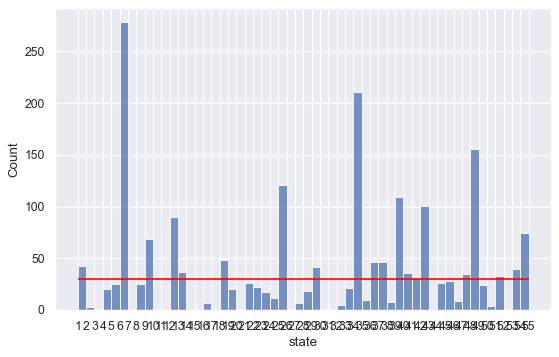

In [93]:
g= sns.histplot(data= X, x='state', bins=np.arange(1,56,1))
g= g.set_xticks(np.arange(1,56,1))
plt.hlines(30, xmin = 1, xmax=55, colors='red')

In [94]:
clean_crime

,state,population,racepctblack,racePctWhite,racePctHisp,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,...,PctVacantBoarded,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,0.19,0.02,0.90,0.17,0.37,0.72,0.60,0.15,0.32,...,0.05,0.14,0.06,0.22,0.38,0.04,0.00,0.26,0.32,0.20
1,53,0.00,0.12,0.74,0.07,0.31,0.72,0.45,0.29,0.33,...,0.02,0.16,0.00,0.21,0.29,0.00,0.00,0.12,0.00,0.67
2,24,0.00,0.49,0.56,0.04,0.30,0.58,0.39,0.40,0.27,...,0.29,0.47,0.45,0.18,0.48,0.00,0.00,0.21,0.00,0.43
3,34,0.04,1.00,0.08,0.10,0.58,0.89,0.43,0.20,0.39,...,0.60,0.11,0.11,0.24,0.63,0.00,0.00,0.39,0.00,0.12
4,42,0.01,0.02,0.95,0.05,0.50,0.72,0.68,0.11,0.28,...,0.04,0.05,0.14,0.31,0.22,0.00,0.00,0.09,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,0.01,0.10,0.87,0.16,0.42,0.74,0.64,0.06,0.27,...,0.00,0.07,0.09,0.20,0.50,0.00,0.00,0.28,0.00,0.09
1990,6,0.05,0.46,0.28,0.32,0.28,0.76,0.30,0.37,0.26,...,0.17,0.17,0.37,0.36,0.69,0.01,0.00,0.37,0.00,0.45
1991,9,0.16,0.25,0.69,0.25,0.31,0.47,0.45,0.48,0.25,...,0.53,0.31,0.29,0.33,0.52,0.06,0.02,0.32,0.91,0.23
1992,25,0.08,0.06,0.87,0.10,0.44,0.64,0.55,0.24,0.29,...,0.17,0.10,0.34,0.54,0.43,0.04,0.01,0.38,0.22,0.19


In [95]:
XXX = clean_crime.drop('ViolentCrimesPerPop', axis=1)
XXX

,state,population,racepctblack,racePctWhite,racePctHisp,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,...,PctHousOccup,PctVacantBoarded,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn
0,8,0.19,0.02,0.90,0.17,0.37,0.72,0.60,0.15,0.32,...,0.71,0.05,0.14,0.06,0.22,0.38,0.04,0.00,0.26,0.32
1,53,0.00,0.12,0.74,0.07,0.31,0.72,0.45,0.29,0.33,...,0.79,0.02,0.16,0.00,0.21,0.29,0.00,0.00,0.12,0.00
2,24,0.00,0.49,0.56,0.04,0.30,0.58,0.39,0.40,0.27,...,0.86,0.29,0.47,0.45,0.18,0.48,0.00,0.00,0.21,0.00
3,34,0.04,1.00,0.08,0.10,0.58,0.89,0.43,0.20,0.39,...,0.97,0.60,0.11,0.11,0.24,0.63,0.00,0.00,0.39,0.00
4,42,0.01,0.02,0.95,0.05,0.50,0.72,0.68,0.11,0.28,...,0.89,0.04,0.05,0.14,0.31,0.22,0.00,0.00,0.09,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,0.01,0.10,0.87,0.16,0.42,0.74,0.64,0.06,0.27,...,0.75,0.00,0.07,0.09,0.20,0.50,0.00,0.00,0.28,0.00
1990,6,0.05,0.46,0.28,0.32,0.28,0.76,0.30,0.37,0.26,...,0.80,0.17,0.17,0.37,0.36,0.69,0.01,0.00,0.37,0.00
1991,9,0.16,0.25,0.69,0.25,0.31,0.47,0.45,0.48,0.25,...,0.65,0.53,0.31,0.29,0.33,0.52,0.06,0.02,0.32,0.91
1992,25,0.08,0.06,0.87,0.10,0.44,0.64,0.55,0.24,0.29,...,0.84,0.17,0.10,0.34,0.54,0.43,0.04,0.01,0.38,0.22


In [96]:
X[X['state'] == 2]

,state,population,racepctblack,racePctWhite,racePctHisp,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,...,PctHousOccup,PctVacantBoarded,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn
799,2,0.03,0.02,0.71,0.05,0.60,0.83,1.00,0.31,0.37,...,0.73,0.14,0.29,1.00,0.26,0.35,0.01,0.00,0.00,0.00
1465,2,0.35,0.13,0.71,0.07,0.53,0.86,0.89,0.30,0.36,...,0.49,0.45,0.20,0.32,0.24,0.40,0.18,0.08,0.01,0.62
1617,2,0.03,0.25,0.58,0.10,0.34,0.80,0.79,0.36,0.26,...,0.44,0.76,0.49,0.35,0.18,0.47,0.04,0.09,0.08,0.00


In [159]:
# find the states with more than 30 observations
state_counts = X['state'].value_counts().to_frame(name = 'counts')
states_with_many_counts = np.array(state_counts[state_counts['counts']>50].index)

In [160]:
def ols_for_each_state(df, state):
    new_df = df[df['state'] == state]
    y = new_df['ViolentCrimesPerPop']
    X = new_df.drop('ViolentCrimesPerPop', axis=1)
    y = np.log(y, where=(y!=0))
    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    most_imp = np.array(get_coef_df(est).head().index)
    r2, rmse = model_fit(est, X, y)
    return r2, rmse, most_imp


In [161]:
my_dict = {'state': [], 'r2': [], 'rmse': [], 'most_imp': []}
for state in states_with_many_counts:
    r2, rmse, most_imp = ols_for_each_state(clean_crime, state)
    my_dict['state'].append(state)
    my_dict['r2'].append(r2)
    my_dict['rmse'].append(rmse)
    my_dict['most_imp'].append(most_imp)


/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the arg

In [162]:
print(pd.DataFrame(my_dict).to_latex())

\begin{tabular}{lrrrl}
\toprule
{} &  state &        r2 &      rmse &                                           most\_imp \\
\midrule
0 &      6 &  0.701893 &  0.411874 &  [pctWInvInc, NumImmig, population, PctPopUnder... \\
1 &     34 &  0.780598 &  0.476346 &  [racePctWhite, NumImmig, medIncome, PctPopUnde... \\
2 &     48 &  0.632337 &  0.489698 &  [NumInShelters, MalePctNevMarr, PctFam2Par, Pc... \\
3 &     25 &  0.675562 &  0.577881 &  [NumImmig, population, racePctWhite, racePctHi... \\
4 &     39 &  0.686773 &  0.595735 &  [NumImmig, racePctWhite, racepctblack, PctLarg... \\
5 &     42 &  0.745628 &  0.534451 &  [NumImmig, NumStreet, racePctWhite, racepctbla... \\
6 &     12 &  0.876185 &  0.266477 &  [racepctblack, racePctHisp, racePctWhite, PctI... \\
7 &      9 &  0.822001 &  0.453411 &  [population, racePctWhite, NumImmig, racepctbl... \\
8 &     55 &  0.670141 &  0.487507 &  [NumStreet, NumImmig, pctWInvInc, racepctblack... \\
\bottomrule
\end{tabular}



In [101]:
# states_with_many_counts[0]

In [102]:
# new_df = clean_crime[clean_crime['state'] == 6]
# y_trial = new_df['ViolentCrimesPerPop']
# X_trial = new_df.drop('ViolentCrimesPerPop', axis=1)
# y_trial = np.log(y_trial, where=(y_trial!=0))
# X_trial= sm.add_constant(X_trial)

# est = sm.OLS(y_trial, X_trial).fit()
# most_imp = np.array(get_coef_df(est).head().index)
# r2, rmse = model_fit(est, X_trial, y_trial)

In [103]:
df_small_clean

,state_name,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,CO,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
16,NY,36,Albanycity,1,0.15,0.31,0.40,0.63,0.14,0.06,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,CA,6,Modestocity,1,0.25,0.54,0.05,0.71,0.48,0.30,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,FL,12,Jacksonvillecity,1,1.00,0.42,0.47,0.59,0.12,0.05,...,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
23,IA,19,SiouxCitycity,1,0.11,0.43,0.04,0.89,0.09,0.06,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,CA,6,SanFranciscocity,10,1.00,0.29,0.21,0.29,1.00,0.26,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
1981,CT,9,Hamdentown,10,0.07,0.38,0.17,0.84,0.11,0.04,...,0.09,0.13,0.17,0.02,0.01,0.72,0.0,0.62,0.15,0.07
1991,CT,9,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,MA,25,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [150]:
small_X = df_small_clean.drop(['state_name', 'state', 'communityname', 'fold', 'ViolentCrimesPerPop'], axis=1)
small_y = df_small_clean['ViolentCrimesPerPop']

In [151]:
corr_matrix = small_X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
# drop the columns that are very correlated between them
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

small_X.drop(to_drop, axis=1, inplace=True)

In [152]:
fitted_small_X = sm.add_constant(small_X)
y_logged_small = np.log(small_y, where=(small_y!=0))

/Users/lysi2/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [153]:
small_model = sm.OLS(y_logged_small,fitted_small_X).fit()
small_model.summary().tables[0]

Dep. Variable:,ViolentCrimesPerPop,R-squared:,0.776
Model:,OLS,Adj. R-squared:,0.710
Method:,Least Squares,F-statistic:,11.81
Date:,"Fri, 22 Apr 2022",Prob (F-statistic):,3.30e-49
Time:,18:32:48,Log-Likelihood:,-133.83
No. Observations:,319,AIC:,413.7
Df Residuals:,246,BIC:,688.5
Df Model:,72,,
Covariance Type:,nonrobust,,


In [154]:
small_r2_train, small_rmse_train = model_fit(small_model, fitted_small_X, y_logged_small, plot=False)

In [155]:
print(small_r2_train, small_rmse_train )

0.7756048629346768 0.3680956514742194


In [156]:
get_coef_df(small_model)

,pvalues,params
pctWInvInc,0.000087,-2.596371
PctFam2Par,0.000362,-2.469094
const,0.248911,1.910545
PctHousLess3BR,0.037886,1.320832
MalePctDivorce,0.023251,-1.054601
...,...,...
PctPersOwnOccup,0.972699,0.020475
OwnOccLowQuart,0.967139,-0.018978
racePctAsian,0.952332,-0.016906
racepctblack,0.989134,-0.006267


In [157]:
all_r2_train = [] ; all_rmse_train = [] ; all_r2_test = [] ; all_rmse_test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(fitted_small_X,y_logged_small)
    r2_train, rmse_train, r2_test , rmse_test = get_ols(X_train, X_test, y_train, y_test, plot=False)
    all_r2_train.append(r2_train)
    all_rmse_train.append(rmse_train)
    all_r2_test.append(r2_test)
    all_rmse_test.append(rmse_test)
av1 = np.average(np.array(all_r2_train))
av2 = np.average(np.array(all_rmse_train))
av3 = np.average(np.array(all_r2_test))
av4 = np.average(np.array(all_rmse_test))
print(av1, av2, av3, av4)

0.7999799188637163 0.34492633580222404 0.2448179921154307 0.6139472277251273
